In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("q0.ipynb")

# Qiskit Assignment 0
## Introduction to Qiskit
Welcome to your first Qiskit assignment! Qiskit is IBM's open-source SDK for working with quantum computers. We will be using Qiskit for programming assignments this semester. This assignment will help you begin to familarize yourself with the assignment workflow.

### Learning Objectives
1. Get familiar with Qiskit
2. Understand the difference between classical and quantum bits
3. Build simple quantum circuits
4. Run your circuit on a quantum computer

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: Sam Schwartz

**STUDENT ID**: 488082

In [3]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
from qiskit.providers.ibmq import least_busy
import numpy as np
import pprint

#### Task 1 - Building a Circuit (20 pts)
Using Qiskit's [QuantumCircuit class](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit), fill in the `simpleCircuit()` function as follows:

- Create a quantum circuit with 1 qubit and 1 classical bit
- Measure the qubit
- Return the circuit

In [29]:
def simpleCircuit():
    qc = QuantumCircuit(1,1)
    qc.measure([0],[0])
    return qc
    

In [30]:
grader.check("Task 1")

Task 1 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Task 2 - Drawing Circuits (20 pts)
We can visualize circuits using the QuantumCircuit's [draw method](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html#qiskit.circuit.QuantumCircuit.draw).

Draw your circuit from Task 1 using the matplotlib format.

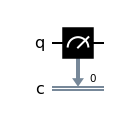

In [38]:
# Draw your circuit in this cell
qc = simpleCircuit()
qc.draw(output = "mpl")

<!-- END QUESTION -->

#### Task 3 - Simulating Circuits and Getting Results (10 pts)
Circuits aren't very helpful unless we can run them and observe the outputs.
We will frequently use the [qasm simulator](https://qiskit.org/documentation/stubs/qiskit.providers.aer.QasmSimulator.html) to simulate our circuit on a quantum machine.

Create a job that runs a simpleCircuit 468 times. You may find these [docs](https://qiskit.org/documentation/apidoc/execute.html) useful. Do the results match what we'd expect from this circuit?

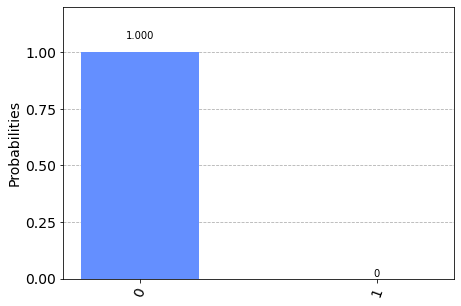

In [44]:
qc = simpleCircuit()
qasm_sim = BasicAer.get_backend("qasm_simulator")

job = execute(qc, qasm_sim, shots = 468)

counts = job.result().get_counts()

# This loop displays a state with zero probability 
# on the histogram for the purpose of 
# comparison with the next section.
for state in ['0','1']:
    if state not in counts:
        counts[state] = 0
        
plot_histogram(counts)

In [45]:
grader.check("Task 3")

Task 3 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Task 4 - Running Your Circuit on a Quantum Computer (20 pts)
Now let's compare our results from the simulator with the results from a real quantum device.

Create an account with [IBM Quantum](https://quantum-computing.ibm.com/login) and paste your API token into the code block below. After running the `save_account` method, you may choose to remove your token to keep it private. Credentials will be saved to your computer, and calling `load_account` is sufficient to retrieve them for future assignments.

In [47]:
 IBMQ.save_account('b1111beee8cc21bc9cb683ce7a875e8d4242cea9026ea281ff87ab9bde4b11eb0513d14c26052afe398bba70aeef9522b0c0eaca94a3682adc3fc5f4b77a7289')

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

The code block below lists some info about the available IBM quantum devices and queues.

In [5]:
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    status = backend.status().to_dict()
    if status['operational'] and status['status_msg'] == 'active':
        if 'simulator' not in status['backend_name']:
            print(pprint.pformat(status))

{'backend_name': 'ibmq_armonk',
 'backend_version': '2.4.29',
 'operational': True,
 'pending_jobs': 1,
 'status_msg': 'active'}
{'backend_name': 'ibmq_bogota',
 'backend_version': '1.6.20',
 'operational': True,
 'pending_jobs': 26,
 'status_msg': 'active'}
{'backend_name': 'ibmq_lima',
 'backend_version': '1.0.30',
 'operational': True,
 'pending_jobs': 43,
 'status_msg': 'active'}
{'backend_name': 'ibmq_belem',
 'backend_version': '1.0.33',
 'operational': True,
 'pending_jobs': 12,
 'status_msg': 'active'}
{'backend_name': 'ibmq_quito',
 'backend_version': '1.1.23',
 'operational': True,
 'pending_jobs': 10,
 'status_msg': 'active'}
{'backend_name': 'ibmq_manila',
 'backend_version': '1.0.25',
 'operational': True,
 'pending_jobs': 155,
 'status_msg': 'active'}


To make this easier, we can use the [`least_busy`](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html#4.-Superdense-Coding-on-a-Real-Quantum-Computer-) method to pick the quantum device with the fewest pending jobs.

In [50]:
lb = least_busy(IBMQ.get_provider(hub='ibm-q').backends(filters=lambda x: not x.configuration().simulator 
                                       and x.status().operational == True))
print("Least busy quantum computer:", lb)

Least busy quantum computer: ibmq_armonk


Choose one of the backends from above and insert its name into the code block below. Running this code block will execuete your circuit on an IBM quantum device. **Note: It may take a while for your job to complete based on queue times.** Use the generated link to check your job's status.

Check job status here: https://quantum-computing.ibm.com/jobs/61f41ae67887b62c8d470dde


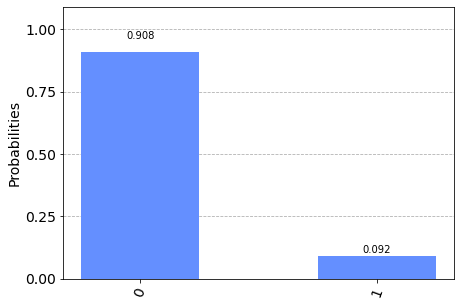

In [51]:
ibmqc = provider.get_backend('ibmq_armonk')
job = execute(simpleCircuit(), ibmqc, shots=468)
print("Check job status here:", "https://quantum-computing.ibm.com/jobs/" + job.job_id())
res = job.result()
counts_ibm = res.get_counts()
plot_histogram(counts_ibm)

Do you see the same results as the qasm simulator? Why or why not? What is the error rate?

No, I do not see the same results as the qasm simulator. Instead of always returning a state of "0" it returns a state of "1" .092% of the time despite having an (expected) probability of 0 of returning "1". The Qasm simulator simulates how an ideal quantum machine acts, whereas the IBM machine is an actual quantum machine and is not perfect. The error rate is thus .092% for this quantum machine with this circuit.

<!-- END QUESTION -->

#### Task 5 - Another Circuit (15 pts)
We now turn to Qiskit's [Pauli X gate](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) so that we can prepare qubits in the $|1\rangle$ state.

There is also a brief discussion of this gate at the end of `lecture 1: Background`.

- Fill in the below function to return a new QuantumCircuit with 2 qubits and 2 classical bits
- Prepare the first qubit in state $|0\rangle$ and the second in state $|1\rangle$
- Perform a measurement of each qubit onto its corresponding classical bit
- Draw the circuit using matplotlib

In [96]:
def opposites():
    qc = QuantumCircuit(2,2)
    state0 = [1,0]
    state1 = [0,1]
    qc.initialize(state0, 0)
    qc.initialize(state1, 1)
    qc.measure(state0,state1)
    return qc
    

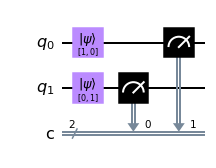

In [97]:
# Draw your circuit in this cell
qc = opposites()
qc.draw(output = "mpl")

In [98]:
grader.check("Task 5")

Task 5 results: All test cases passed!

#### Task 6 - More Counts (15 pts)

Think about what output you expect to see from this circuit. 
- Run your circuit on the qasm simulator 468 times
- Store the measurement results in `counts_oppo`

Note that the following cell uses Qiskit's [`reverse_bits()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reverse_bits.html#qiskit.circuit.QuantumCircuit.reverse_bits) function. This flips the ordering of qubits a multi-qubit circuit and changes the [endianness](https://en.wikipedia.org/wiki/Endianness) of the resulting statevector, $|01\rangle$. The reasons for this will become clear in the upcoming lectures and notebook assignments.

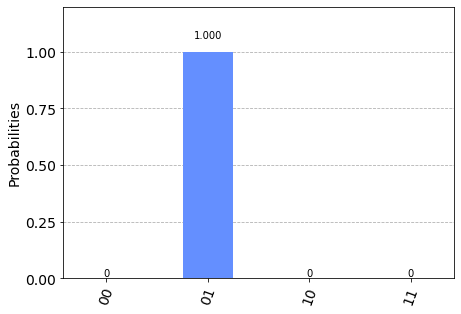

In [105]:
qc = opposites().reverse_bits()

job = execute(qc.reverse_bits(), qasm_sim, shots = 468)
counts_oppo = job.result().get_counts()

for state in ['00','01','10','11']:
    if state not in counts_oppo:
        counts_oppo[state] = 0
plot_histogram(counts_oppo)

In [106]:
grader.check("Task 6")

Task 6 results: All test cases passed!

## Conclusion
This is the general workflow of building and running quantum circuits. We will introduce more qubits and gates as needed to solve problems.

Next time: the unitary gate and single qubit circuits!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [107]:
grader.check_all()

Task 1 results: All test cases passed!

Task 3 results: All test cases passed!

Task 5 results: All test cases passed!

Task 6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)